# BANK MARKETING(CAPSTONE PROJECT)

## Description of dataset - 
The data is related with direct marketing campaigns of a Portuguese banking institution.The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed. 

## Objective - 
To predict whether client will subscribe a term deposit or not (variable y).

## Following steps to perform to create Model
1. Importing required libraries

2. Preparation ,understanding and cleaning and  of data
    2.1 Review dataframe
    2.2 Variable categorisation(Count of numeric and categorical)
    2.3 Pre-processing Data Analysis
        2.3.1 Checking for null values(Imputing if found any)
        2.3.2 Data duplication and redundant columns.
3. Exploratory Data Analysis
    3.1 Univariate Analysis
    3.2 Bivariate Analysis 
        3.2.1 For Categorical Features
        3.2.2 For Numerical Features
    3.3 Distribution of variables
    3.4 Checking for multi colinearity
4. Feature Engineering
    4.1 Feature Selection
    4.2 Data Transformation 
5. Model Building
    5.1 Test train split of data
    5.2 Defining Model
    5.3 Evaluation of Model 
    5.4 Comparision of different model built
    5.5 Feature Importance
6. Conclusion
7. Model testing on sample dataset
8. Business Recommendations

### Step-1: Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

### Step-2: Preparation , understanding and cleaning of data. 

In [2]:
#Importing dataset
df=pd.read_excel('D:\Bank_train.xlsx')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
df.shape

(45211, 17)

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
#Finding numerical and categorical features
df.dtypes.value_counts()

object    10
int64      7
dtype: int64

In [7]:
#Checking for null values in the dataset
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
#Unique values in various categorical columns
print(df['job'].unique())
print(df['marital'].unique())
print(df['education'].unique())
print(df['default'].unique())
print(df['housing'].unique())
print(df['loan'].unique())
print(df['contact'].unique())
print(df['month'].unique())
print(df['poutcome'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary']
['no' 'yes']
['yes' 'no']
['no' 'yes']
['unknown' 'cellular' 'telephone']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
['unknown' 'failure' 'other' 'success']


**Dataset has no null values.

In [9]:
#Checking for duplicate value in dataset
df.duplicated().any()

False

Dataset has no duplicate data

In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Step-3: Exploratory Data Analysis

#### Univariate analysis of output variable

In [11]:
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

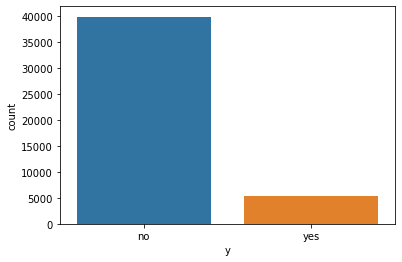

In [12]:
#Univariate analysis of output variable
sns.countplot(x ="y" , data=df)

1. Most of the people contacted has not subscribed the term deposit,suggesting that bank is doing cold calling to the people.
2. Success rate is very less(Approx -11-12%).

#### Bivariate Analysis of Output variable and categorical features

##### Categorical Features: job, marital, education, default, housing , loan , contact , month , poutcome , y 

1.Analysis of relation between **type of job and y

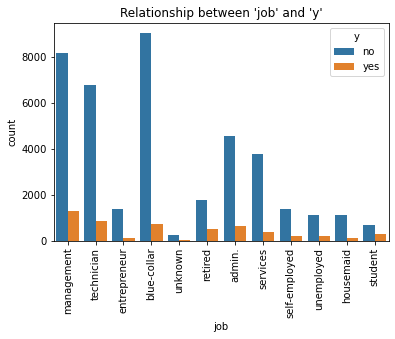

In [13]:
job = sns.countplot(x="job" , data= df , hue="y")
plt.title("Relationship between 'job' and 'y'")
job.tick_params(axis='x' , rotation = 90)

1. Most of the people contacted by bank are professionals.(i.e. Blue collar , management etc)
2. Most of the subscription is done by professionals(i.e Management , Technicians , Blue collar)
**This feature can contribute significantly in predicting the outcome.

2.Analysis of relation between **marital status and y

Text(0.5, 1.0, "Relationship between 'Marital Status' and 'y'")

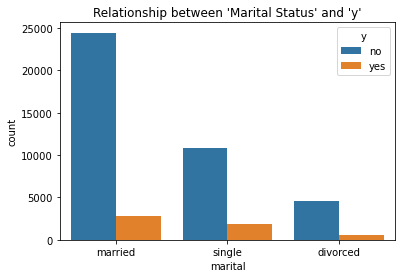

In [14]:
marital = sns.countplot(x="marital" , data= df , hue="y")
plt.title("Relationship between 'Marital Status' and 'y'")


1. There is more married people followed by single and then divorced.
2. Married people subscribed the term deposit more , follwed by single and thenat last divorced.
3. There is direct relationship. More calls , more subscription.
**This feature can contribute significantly in predicting the outcome.

3.Analysis of relation between **level of education and y

Text(0.5, 1.0, "Relationship between 'Education Level ' and 'y'")

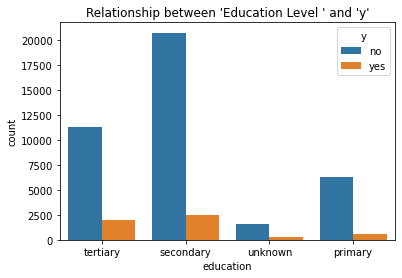

In [15]:
education = sns.countplot(x="education" , data= df , hue="y")
plt.title("Relationship between 'Education Level ' and 'y'")

1. There are more people with higher education level.(Secondary and Tertiary)
2. People with secondary and tertiary education level has subscribed the term deposit more.
3. There is a direct porportional relationship in secondary and tertiary.More profile , more subscription.
**This feature can contribute a lot to predict the outcome.

4.Analysis of relation between **default in credit and y

Text(0.5, 1.0, "Relationship between 'default' and 'y'")

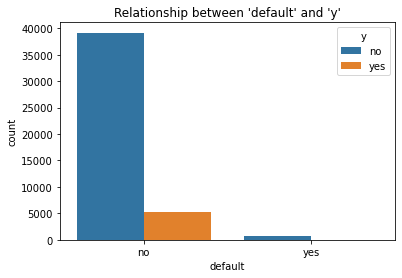

In [16]:
default = sns.countplot(x="default" , data= df , hue="y")
plt.title("Relationship between 'default' and 'y'")

1. Most of the people contacted by bank are the ones who do not have credit in default.
2. ***Most of the people who subscribe the term deposit are the non-defaulters.
3. ***People who are defaulters are less likely to subscribe the term deposit. 
This default feature can contribute a lot in predicting predicting the outcome.

5.Analysis of relation between **housing loan and y

Text(0.5, 1.0, "Relationship between 'housing' and 'y'")

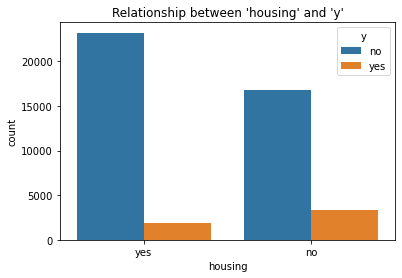

In [17]:
default = sns.countplot(x="housing" , data= df , hue="y")
plt.title("Relationship between 'housing' and 'y'")

1. There are more people with housing loan
2. People with housing loans are less likley to subscribe the term deposit
3. People without housing loan are more likely to subscribe the term deposit.
**There is inverse relationship.
**This feature can contribute a lot in predicting the outcome.

6.Analysis of relation between **personal loan and y

Text(0.5, 1.0, "Relationship between 'loan' and 'y'")

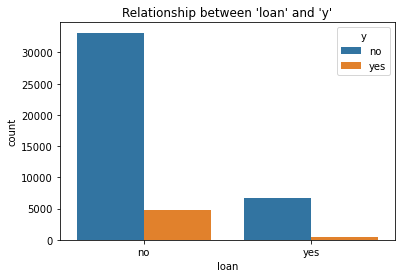

In [18]:
default = sns.countplot(x="loan" , data= df , hue="y")
plt.title("Relationship between 'loan' and 'y'")

1. There are more people without personal loan contacted by bank.
2. People without personal loan are subscribing more as compare to the people with personal loan.
3. **Direct proportion relation. More profile, more subcription
**This feature can contribute a lot in predicting the outcome.

7.Analysis of relation between **contact communication type and y

Text(0.5, 1.0, "Relationship between 'contact' and 'y'")

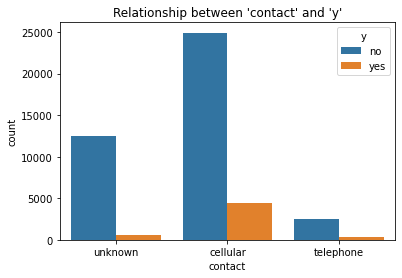

In [19]:
contact = sns.countplot(x="contact" , data= df , hue="y")
plt.title("Relationship between 'contact' and 'y'")

1. People with the cellular connection are more likely to subscribe the term deposit than people with telephonic connection.
2. **Direct proportion relation. More profile, more subcription
**This feature can contribute in our model building.

8.Analysis of relation between **Last contact month and y

Text(0.5, 1.0, "Relationship between 'month' and 'y'")

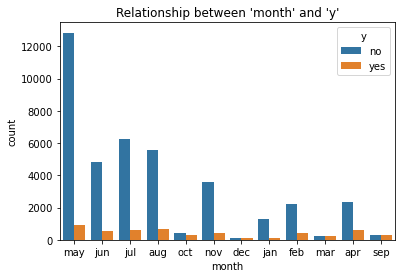

In [20]:
month = sns.countplot(x="month" , data= df , hue="y")
plt.title("Relationship between 'month' and 'y'")

1. May month got more subscriber followed by april and august.
2. Subscription rate seems almost same for every month except december, march and september.
3. subscription is almost same except the month of december and january where subscriptions are very less.
**This feature does not indicate any pattern so and can not help us in predicting the outcome.So this feature can be eliminated.

9.Analysis of relation between **previous outcome and y

Text(0.5, 1.0, "Relationship between 'poutcome' and 'y'")

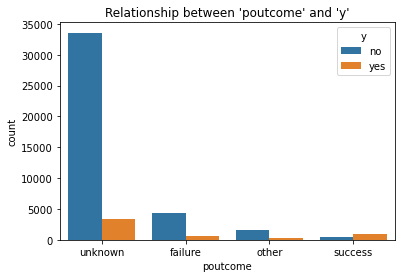

In [21]:
poutcome = sns.countplot(x="poutcome" , data= df , hue="y")
plt.title("Relationship between 'poutcome' and 'y'")

1. The result of most of the profile is unknown means most of the people contacted by bank are new.
2. Success rate is very less , but would be relevant.
**This feature can contribute significantly in predicting the outcome. 

#### Bivariate Analysis of Output variable and numerical features

##### Numerical Features: "age","balance","day","duration", "campaign","pdays","" 

1.Analysis of relation between **age and y

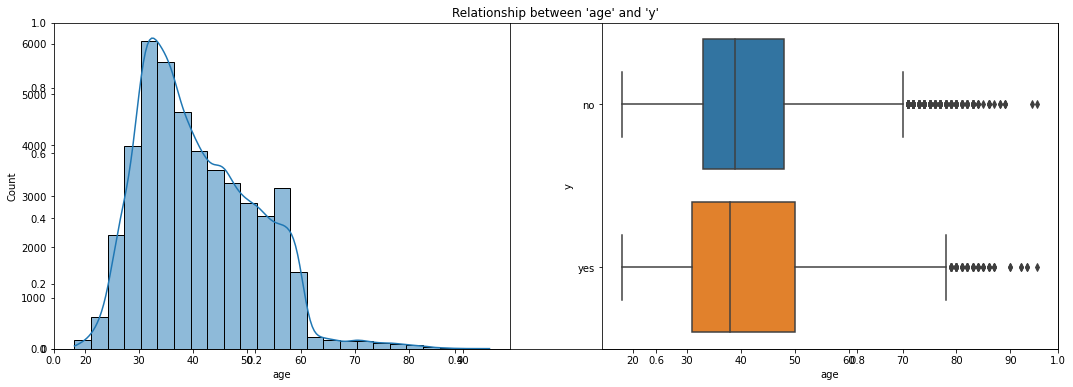

In [22]:
fig=plt.figure(figsize=(18,6))
plt.title("Relationship between 'age' and 'y'")

fig.add_subplot(121)
sns.histplot(data=df , x= "age" , bins=25 , kde = True)

fig.add_subplot(122)
sns.boxplot(data=df , x="age", y="y")

plt.show()

1. The curve has bell shaped with little shifted to the left side so it is right skewed.
2. People with the age between 30-40 are more likely to subscribe the term deposit.This can be supporrted by the fact that most of the people get settled in this age and look for stability in lilfe.
**This feature can contribute a lot in predicting the outcome.

2.Analysis of relation between **average yearly balance and y

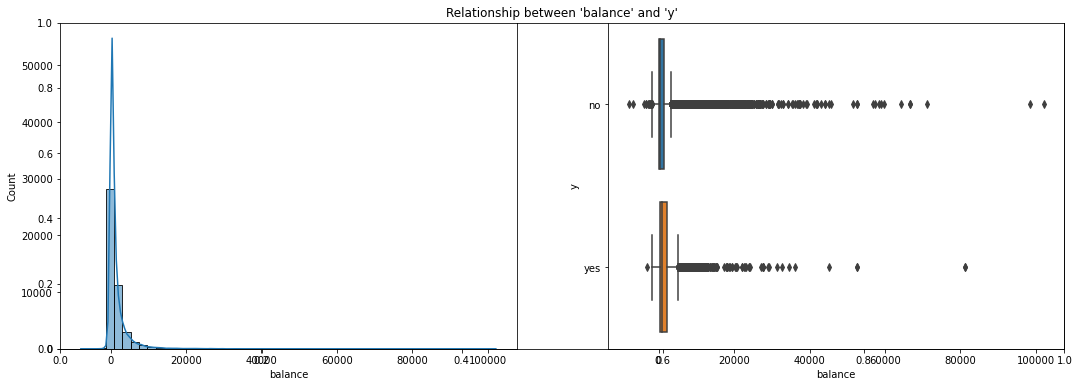

In [23]:
fig=plt.figure(figsize=(18,6))
plt.title("Relationship between 'balance' and 'y'")

fig.add_subplot(121)
sns.histplot(data=df , x= "balance" , bins=50 , kde = True)

fig.add_subplot(122)
sns.boxplot(data=df , x="balance" , y="y")

plt.show()

1. Most of the people contacted has zero yearly balance.
**This feature can contribute us in predicting the outcome.

3.Analysis of relation between **last contact day of the month and y

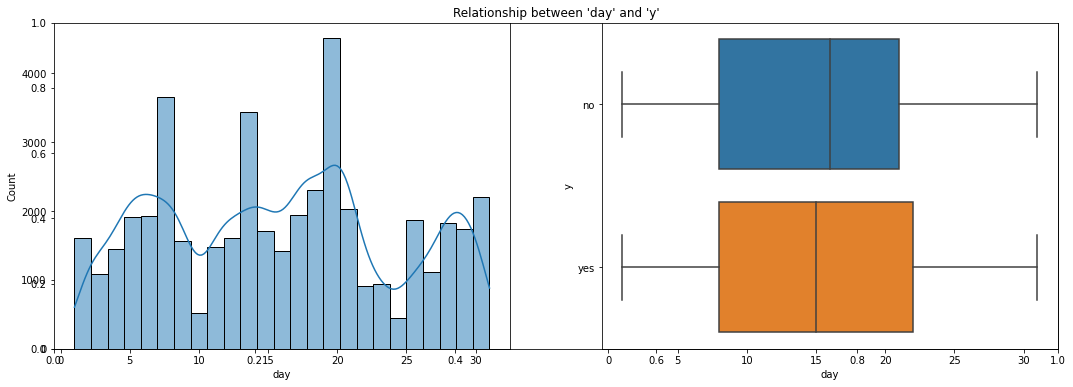

In [24]:
fig=plt.figure(figsize=(18,6))
plt.title("Relationship between 'day' and 'y'")

fig.add_subplot(121)
sns.histplot(data=df , x= "day" , bins=25 , kde = True)

fig.add_subplot(122)
sns.boxplot(data=df , x="day" , y="y")

plt.show()

1. Bank contact more the on 7th, 14th & 20th. But it does not signify anything considerable and graph is also not showing any pattern.
**This Feature can be eliminate from our analysis as it does not contribute anything in predicting the outcome.

4.Analysis of relation between **last contact duration and y

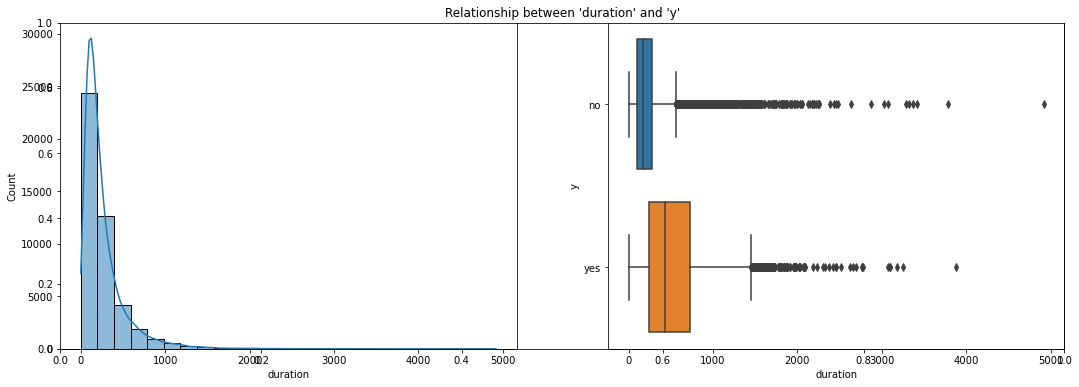

In [25]:
fig=plt.figure(figsize=(18,6))
plt.title("Relationship between 'duration' and 'y'")

fig.add_subplot(121)
sns.histplot(data=df , x= "duration" , bins=25 , kde = True)

fig.add_subplot(122)
sns.boxplot(data=df , x="duration" , y="y")

plt.show()

1.People with whom conversation duration is between 0 to 2 minutes are less likely to subscribe the term deposit.

**Since we can not have this information prior to the contact we should not use this feature in predicting the outcome so we will eliminate this column.

5.Analysis of relation between **number of contact performed during this campaign and y

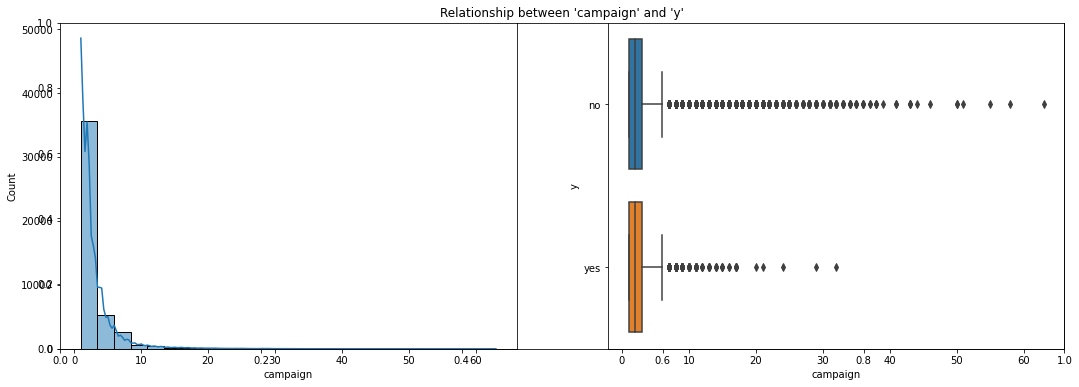

In [26]:
fig=plt.figure(figsize=(18,6))
plt.title("Relationship between 'campaign' and 'y'")

fig.add_subplot(121)
sns.histplot(data=df , x= "campaign" , bins=25 , kde = True)

fig.add_subplot(122)
sns.boxplot(data=df , x="campaign" , y="y")

plt.show()

1. Most of the people are likely to subscribe the term deposit in fewer calls.
2. Repeatative calling to a customer is not that much effective.
3. Box plot suggest that even in fewer calls the chances of subscription are 50-50 only.
**This features will be eliminate as it does not contribute significantly in predicting the outcome.

6.Analysis of relation between **number of days passed after the client was last contacted from previous campaign and y

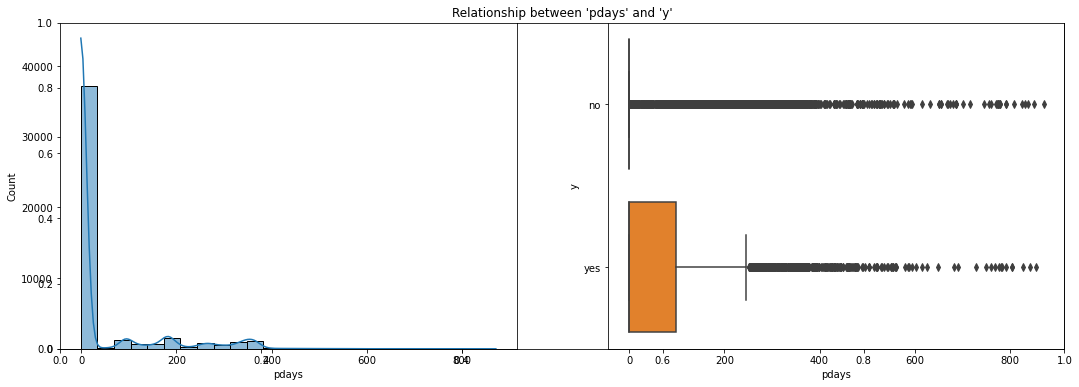

In [27]:
fig=plt.figure(figsize=(18,6))
plt.title("Relationship between 'pdays' and 'y'")

fig.add_subplot(121)
sns.histplot(data=df , x= "pdays" , bins=25 , kde = True)

fig.add_subplot(122)
sns.boxplot(data=df , x="pdays" , y="y")

plt.show()

1. Plots shows that most of the people are contacted for the first time only (pdays value is -1 for more than 40000 records )
**This feature can be eliminated as most of the people are contacted for the first time.

7.Analysis of relation between **number of contact performed before this campaign and y

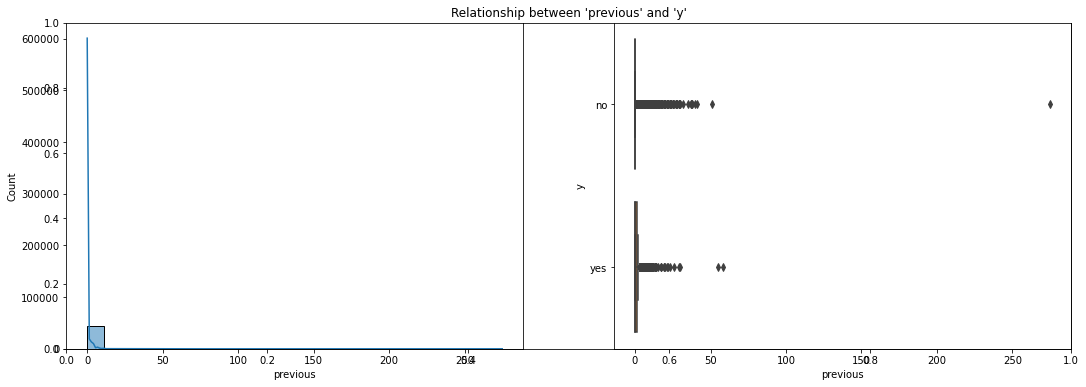

In [28]:
fig=plt.figure(figsize=(18,6))
plt.title("Relationship between 'previous' and 'y'")

fig.add_subplot(121)
sns.histplot(data=df , x= "previous" ,bins=25,kde = True)

fig.add_subplot(122)
sns.boxplot(data=df , x="previous" , y="y")

plt.show()

1. Most of the people are newly contacted as value of "previous" feature is zero.
2. It means bank is targetting new customer in this campaign.
**This feature can be eliminated as do not contribute anything considerable in predicting the term deposit subscription. 

#### To check the multi-collinearity we should plot heat map.

To get heat map we need to replaces the categories in categorical column with numerical values.

In [29]:
#Replacing numerical values in categorical column
df=pd.read_excel('D:\Bank_train.xlsx')

df['default'].replace(['yes','no'] , [0,1] , inplace=True)
df['housing'].replace(['yes','no'] , [0,1] , inplace=True)
df['loan'].replace(['yes','no'] , [0,1] , inplace=True)
df['y'].replace(['yes','no'] , [0,1] , inplace=True)
df['month'].replace(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'] , [1,2,3,4,5,6,7,8,9,10,11,12] , inplace=True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,1,2143,0,1,unknown,5,5,261,1,-1,0,unknown,1
1,44,technician,single,secondary,1,29,0,1,unknown,5,5,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,1,2,0,0,unknown,5,5,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,1,1506,0,1,unknown,5,5,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,1,1,1,1,unknown,5,5,198,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,1,825,1,1,cellular,17,11,977,3,-1,0,unknown,0
45207,71,retired,divorced,primary,1,1729,1,1,cellular,17,11,456,2,-1,0,unknown,0
45208,72,retired,married,secondary,1,5715,1,1,cellular,17,11,1127,5,184,3,success,0
45209,57,blue-collar,married,secondary,1,668,1,1,telephone,17,11,508,4,-1,0,unknown,1


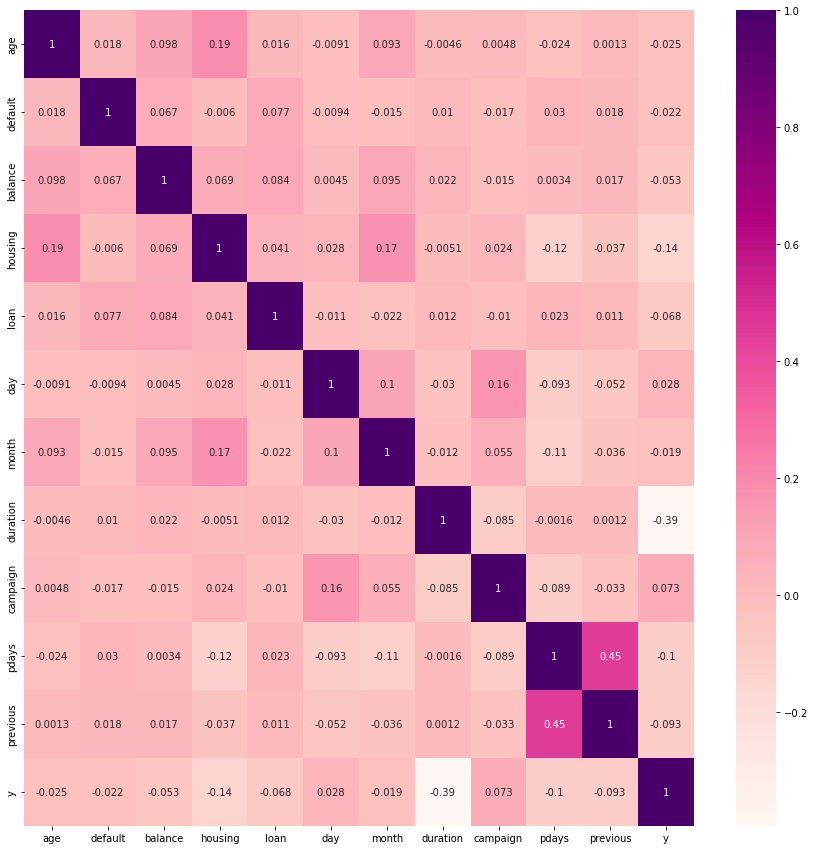

In [30]:
#Plotting Heat map
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap='RdPu')
plt.show()

There is not much collinearity in the input variable.
Significant amount of collinearity can be seen in between 'pdays' and 'previous' features.

### Step-4: Feature Engineering

#### Feature Selection

From Exploratory data analysis following we concluded that whether a feature can contribute in predicting the outcome or not.

**Selected Features : "job", "marital", "education", "default", "housing", "loan", "contact", "poutcome", "age", "balance"

**Eliminated features : "month", "day", "duration", "campaign", "pdays", "previous".

In [31]:
#Dropping the column from the dataset
df1=df.drop(['month','day','duration','campaign','pdays','previous','y'] , axis=1)
df1

,age,job,marital,education,default,balance,housing,loan,contact,poutcome
0,58,management,married,tertiary,1,2143,0,1,unknown,unknown
1,44,technician,single,secondary,1,29,0,1,unknown,unknown
2,33,entrepreneur,married,secondary,1,2,0,0,unknown,unknown
3,47,blue-collar,married,unknown,1,1506,0,1,unknown,unknown
4,33,unknown,single,unknown,1,1,1,1,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,1,825,1,1,cellular,unknown
45207,71,retired,divorced,primary,1,1729,1,1,cellular,unknown
45208,72,retired,married,secondary,1,5715,1,1,cellular,success
45209,57,blue-collar,married,secondary,1,668,1,1,telephone,unknown


#### Data Transformation

In [32]:
#Getting dummy variables for the categorical column
df1=pd.get_dummies(df1,columns=['job','marital','education','contact','poutcome'])
df1

,age,default,balance,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,1,2143,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
1,44,1,29,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
2,33,1,2,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
3,47,1,1506,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4,33,1,1,1,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,825,1,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
45207,71,1,1729,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,1,5715,1,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
45209,57,1,668,1,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1


In [33]:
#Data for input variables 
X=df1
X

,age,default,balance,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,1,2143,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
1,44,1,29,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
2,33,1,2,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
3,47,1,1506,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4,33,1,1,1,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,825,1,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
45207,71,1,1729,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,1,5715,1,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
45209,57,1,668,1,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1


In [34]:
#Data for output variable
y=df['y']
y

0        1
1        1
2        1
3        1
4        1
        ..
45206    0
45207    0
45208    0
45209    1
45210    1
Name: y, Length: 45211, dtype: int64

### Step-5 Model Building

In [35]:
#importing libraries for model creation & evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import tree
from sklearn.feature_selection import SelectFromModel

#### Splitting of data into training and testing data

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
print("Shape of X_train:-", X_train.shape)
print("Shape of y_train:-", y_train.shape)
print("Shape of X_test:-", X_test.shape)
print("Shape of y_test:-", y_test.shape)

Shape of X_train:- (33908, 31)
Shape of y_train:- (33908,)
Shape of X_test:- (11303, 31)
Shape of y_test:- (11303,)


#### Defining Model

 **Logistic Regression Algorithm

In [37]:
logreg = LogisticRegression().fit(X_train,y_train)
ypred_logreg = logreg.predict(X_test)

**KNN Model

In [38]:
KNN = KNeighborsClassifier(n_neighbors = 8) 
KNN.fit(X_train,y_train) ## train y 
ypred_KNN = KNN.predict(X_test)

**SVC Model

In [39]:
SV = SVC()
SV.fit(X_train,y_train)
ypred_SVC = SV.predict(X_test)

**Naive Bayes Model

In [40]:
NB = GaussianNB()
NB.fit(X_train,y_train)
ypred_NB= NB.predict(X_test)

**Random Forest Classfier

In [41]:
rfc=RandomForestClassifier(n_estimators=50 , max_depth=5 , random_state=101)
rfc.fit(X_train,y_train)
ypred_rfc=rfc.predict(X_test)

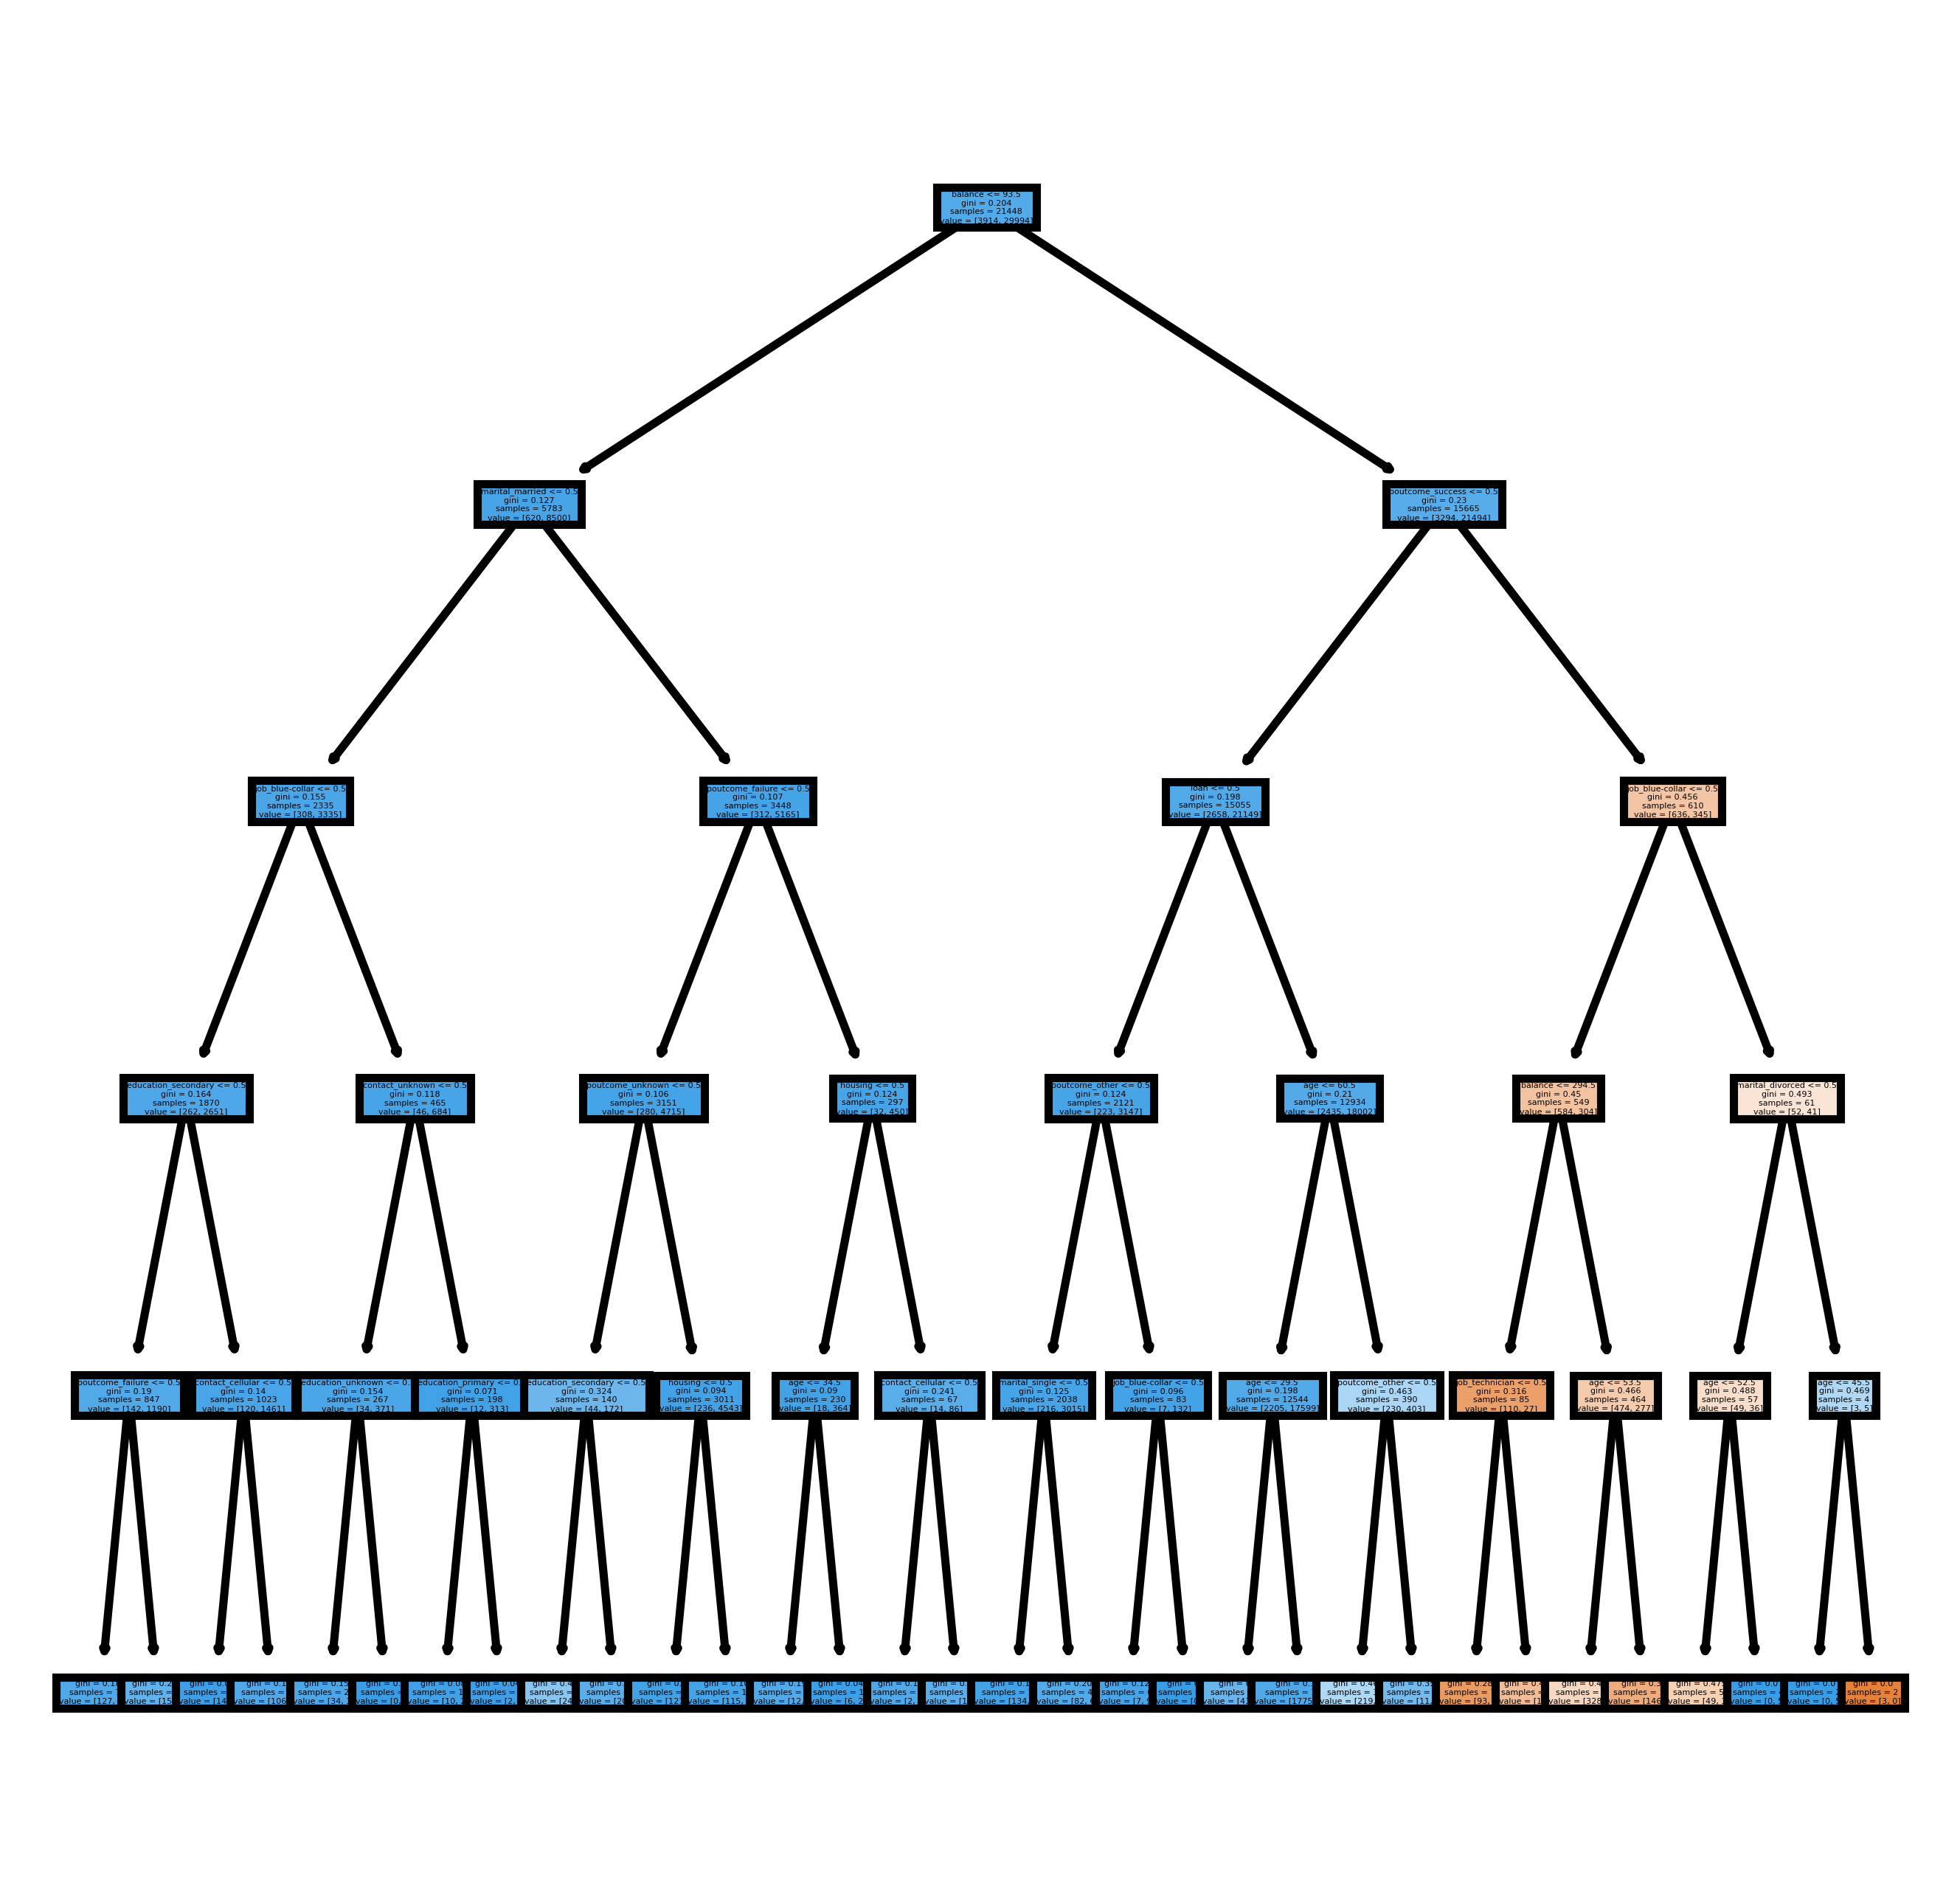

In [42]:
#Visualisation of Random Forest Classifier
fig, axes = plt.subplots(nrows=1,ncols=1 ,figsize=(4,4),dpi=800)
tree.plot_tree(rfc.estimators_[0],
              feature_names =X.columns,
              filled =True);
fig.savefig('rfc.individualtree.png')

#### Evaluation and Comparision of model

In [43]:
# Various evaluation metrics of Logistic Regression Model
def LR():
    print("Evaluation of Logistic Regression Model")
    print('Logistic Regression\n', classification_report(y_test,ypred_logreg))
    print('F1 Score:' ,f1_score(y_test,ypred_logreg))
    print('confusion Matrix:\n' ,confusion_matrix(ypred_logreg,y_test))
    print('AUC score:\n',roc_auc_score(ypred_logreg,y_test))
    print('Accuracy score:\n',accuracy_score(y_test,ypred_logreg))
    
    
# Various evaluation metrics of KNN Model    
def KNN():
    print("Evaluation of KNN Model")
    print('Report:\n', classification_report(y_test,ypred_KNN))
    print('F1 Score:' ,f1_score(y_test,ypred_KNN))
    print('confusion Matrix:\n' ,confusion_matrix(ypred_KNN,y_test))
    print('AUC score:\n',roc_auc_score(ypred_KNN,y_test))
    print('Accuracy score:\n',accuracy_score(y_test,ypred_KNN))
    

# Various evaluation metrics of Support Vector Classifier    
def SVC1():
    print("Evaluation of Random Forest Classifier Model")
    print('Report:\n', classification_report(y_test,ypred_SVC))
    print('F1 Score:' ,f1_score(y_test,ypred_SVC))
    print('confusion Matrix:\n' ,confusion_matrix(ypred_SVC,y_test))
    print('Accuracy score:\n',accuracy_score(y_test,ypred_SVC))
    

# Various evaluation metrics of Naive Bayes Model   
def NB():
    print("Evaluation of Random Forest Classifier Model")
    print('Report:\n', classification_report(y_test,ypred_NB))
    print('F1 Score:' ,f1_score(y_test,ypred_NB))
    print('confusion Matrix:\n' ,confusion_matrix(ypred_NB,y_test))
    print('AUC score:\n',roc_auc_score(ypred_NB,y_test))
    print('Accuracy score:\n',accuracy_score(y_test,ypred_NB))


# Various evaluation metrics of Random Forest Classifier    
def RF():
    print("Evaluation of Random Forest Classifier Model")
    print('Report:\n', classification_report(y_test,ypred_rfc))
    print('F1 Score:' ,f1_score(y_test,ypred_rfc))
    print('cross validation:\n',cross_val_score(rfc,X,y, cv=5))
    print('AUC score:\n',roc_auc_score(ypred_rfc,y_test))
    print('Accuracy score:\n',accuracy_score(y_test,ypred_rfc))
    

In [44]:
LR()

Evaluation of Logistic Regression Model
Logistic Regression
               precision    recall  f1-score   support

           0       0.62      0.16      0.26      1325
           1       0.90      0.99      0.94      9978

    accuracy                           0.89     11303
   macro avg       0.76      0.58      0.60     11303
weighted avg       0.87      0.89      0.86     11303

F1 Score: 0.9407605579973248
confusion Matrix:
 [[ 217  132]
 [1108 9846]]
AUC score:
 0.7603131197772608
Accuracy score:
 0.8902946120498982


In [45]:
KNN()

Evaluation of KNN Model
Report:
               precision    recall  f1-score   support

           0       0.34      0.08      0.14      1325
           1       0.89      0.98      0.93      9978

    accuracy                           0.87     11303
   macro avg       0.62      0.53      0.53     11303
weighted avg       0.83      0.87      0.84     11303

F1 Score: 0.9318507206261333
confusion Matrix:
 [[ 112  215]
 [1213 9763]]
AUC score:
 0.6159968984317187
Accuracy score:
 0.8736618596832699


In [46]:
SVC1()

Evaluation of Random Forest Classifier Model
Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1325
           1       0.88      1.00      0.94      9978

    accuracy                           0.88     11303
   macro avg       0.44      0.50      0.47     11303
weighted avg       0.78      0.88      0.83     11303

F1 Score: 0.9377378882571308
confusion Matrix:
 [[   0    0]
 [1325 9978]]
Accuracy score:
 0.8827744846500929


C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
NB()

Evaluation of Random Forest Classifier Model
Report:
               precision    recall  f1-score   support

           0       0.32      0.39      0.35      1325
           1       0.92      0.89      0.90      9978

    accuracy                           0.83     11303
   macro avg       0.62      0.64      0.63     11303
weighted avg       0.85      0.83      0.84     11303

F1 Score: 0.9019188680205629
confusion Matrix:
 [[ 516 1118]
 [ 809 8860]]
AUC score:
 0.6160600072940652
Accuracy score:
 0.8295142882420596


In [48]:
RF()

Evaluation of Random Forest Classifier Model
Report:
               precision    recall  f1-score   support

           0       0.68      0.14      0.23      1325
           1       0.90      0.99      0.94      9978

    accuracy                           0.89     11303
   macro avg       0.79      0.56      0.59     11303
weighted avg       0.87      0.89      0.86     11303

F1 Score: 0.9415068297558422
cross validation:
 [0.88300343 0.88376465 0.88586596 0.89349701 0.87403229]
AUC score:
 0.7871350594680605
Accuracy score:
 0.8912678050075201


Random forest has better precision, recall, F1-score,confusion matrix,AUC score , Accuracy.

#### Feature Importance(Best two Model)

Feature Importance for Logistic Regression Model

In [49]:
smf=SelectFromModel(logreg)
smf.fit(X_train,y_train)
features = smf.get_support()
features_name_lr=X_train.columns[features]
features_name_lr

Index(['default', 'housing', 'loan', 'job_retired', 'marital_married',
       'contact_unknown', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

Feature Importance for Random Forest Classifier Model

In [50]:
smf=SelectFromModel(rfc)
smf.fit(X_train,y_train)
features = smf.get_support()
features_name_rfc=X_train.columns[features]
features_name_rfc

Index(['age', 'balance', 'housing', 'contact_cellular', 'contact_unknown',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

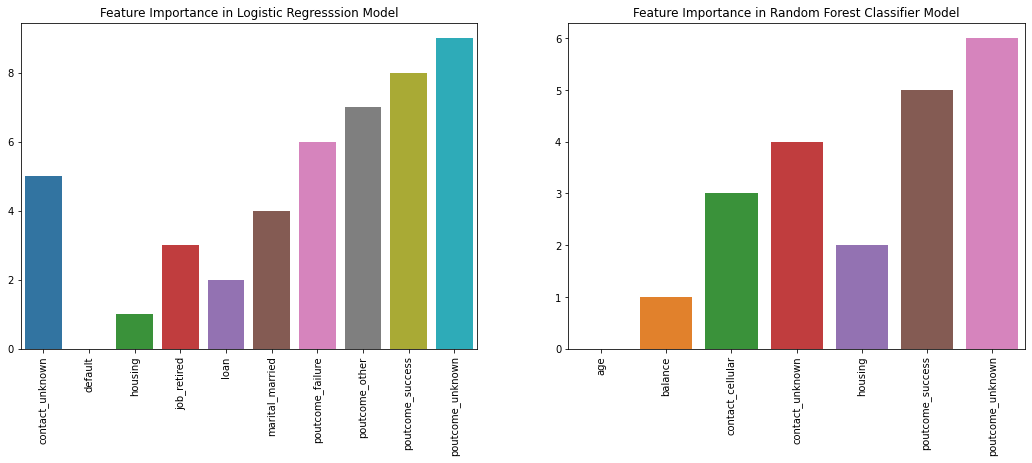

In [51]:
importances_lr=features_name_lr
fig=plt.figure(figsize=(18,6))

fig.add_subplot(121)
feature_importances_lr=pd.Series(importances_lr).sort_values(ascending=True)
sns.barplot(x=feature_importances_lr[0:10],y=feature_importances_lr.index[0:10])
plt.tick_params(axis='x' , rotation = 90)
plt.title("Feature Importance in Logistic Regresssion Model")

importances_rfc=features_name_rfc
fig.add_subplot(122)
feature_importances_rfc=pd.Series(importances_rfc).sort_values(ascending=True)
sns.barplot(x=feature_importances_rfc[0:8],y=feature_importances_rfc.index[0:8])
plt.tick_params(axis='x' , rotation = 90)
plt.title("Feature Importance in Random Forest Classifier Model")
plt.show()

Most of the important feature of both the model are different

###  Step-6:- Conclusion

**On comparing both the model we found that, Random Forest Classifier model performing better than other models.

### Step-7:- Testing the model on Sample Dataset

In [52]:
#importing sample dataset
df_sample=pd.read_excel('D:\Bank_sample.xlsx')
df_sample

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [53]:
#Replacing values of categorical variable with the numerical values
df_sample['default'].replace(['yes','no'] , [0,1] , inplace=True)
df_sample['housing'].replace(['yes','no'] , [0,1] , inplace=True)
df_sample['loan'].replace(['yes','no'] , [0,1] , inplace=True)
df_sample['y'].replace(['yes','no'] , [0,1] , inplace=True)
df_sample['month'].replace(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'] , [1,2,3,4,5,6,7,8,9,10,11,12] , inplace=True)
df_sample

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,1,1787,1,1,cellular,19,10,79,1,-1,0,unknown,1
1,33,services,married,secondary,1,4789,0,0,cellular,11,5,220,1,339,4,failure,1
2,35,management,single,tertiary,1,1350,0,1,cellular,16,4,185,1,330,1,failure,1
3,30,management,married,tertiary,1,1476,0,0,unknown,3,6,199,4,-1,0,unknown,1
4,59,blue-collar,married,secondary,1,0,0,1,unknown,5,5,226,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,1,-333,0,1,cellular,30,7,329,5,-1,0,unknown,1
4517,57,self-employed,married,tertiary,0,-3313,0,0,unknown,9,5,153,1,-1,0,unknown,1
4518,57,technician,married,secondary,1,295,1,1,cellular,19,8,151,11,-1,0,unknown,1
4519,28,blue-collar,married,secondary,1,1137,1,1,cellular,6,2,129,4,211,3,other,1


In [54]:
df_sample1=df_sample.drop(['month','day','duration','campaign','pdays','previous','y'] , axis=1)
df_sample1

,age,job,marital,education,default,balance,housing,loan,contact,poutcome
0,30,unemployed,married,primary,1,1787,1,1,cellular,unknown
1,33,services,married,secondary,1,4789,0,0,cellular,failure
2,35,management,single,tertiary,1,1350,0,1,cellular,failure
3,30,management,married,tertiary,1,1476,0,0,unknown,unknown
4,59,blue-collar,married,secondary,1,0,0,1,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,1,-333,0,1,cellular,unknown
4517,57,self-employed,married,tertiary,0,-3313,0,0,unknown,unknown
4518,57,technician,married,secondary,1,295,1,1,cellular,unknown
4519,28,blue-collar,married,secondary,1,1137,1,1,cellular,other


In [55]:
df_sampletrain=pd.get_dummies(df_sample1,columns=['job','marital','education','contact','poutcome'])
df_sampletrain

,age,default,balance,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1,1787,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,33,1,4789,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
2,35,1,1350,0,1,0,0,0,0,1,...,0,1,0,1,0,0,1,0,0,0
3,30,1,1476,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,59,1,0,0,1,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,1,-333,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
4517,57,0,-3313,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4518,57,1,295,1,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
4519,28,1,1137,1,1,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0


In [56]:
X_strain = df_sampletrain
X_strain

,age,default,balance,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1,1787,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,33,1,4789,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
2,35,1,1350,0,1,0,0,0,0,1,...,0,1,0,1,0,0,1,0,0,0
3,30,1,1476,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,59,1,0,0,1,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,1,-333,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
4517,57,0,-3313,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4518,57,1,295,1,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
4519,28,1,1137,1,1,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0


In [57]:
y_strain=df_sample['y']
y_strain

0       1
1       1
2       1
3       1
4       1
       ..
4516    1
4517    1
4518    1
4519    1
4520    1
Name: y, Length: 4521, dtype: int64

In [58]:
#splitting of data into training and testing dataset
X_train,X_test,y_train,y_test1 = train_test_split(X_strain,y_strain,test_size=0.25,random_state=0)
print("Shape of X_strain:-", X_strain.shape)
print("Shape of y_train:-", y_strain.shape)
print("Shape of X_test:-", X_test.shape)
print("Shape of y_test1:-", y_test1.shape)

Shape of X_strain:- (4521, 31)
Shape of y_train:- (4521,)
Shape of X_test:- (1131, 31)
Shape of y_test1:- (1131,)


In [59]:
#model building
rfc_sample=RandomForestClassifier(n_estimators=50 , max_depth=5 , random_state=101)
rfc_sample.fit(X_train,y_train)
ypred_rfc=rfc_sample.predict(X_test)

In [60]:
def RF_Sample():
    print("Evaluation of Sample Dataset")
    print('Report:\n', classification_report(y_test1,ypred_rfc))
    print('F1 Score:' ,f1_score(y_test1,ypred_rfc))
    print('confusion Matrix:\n' ,confusion_matrix(ypred_rfc,y_test1))
    print('cross validation:\n',cross_val_score(rfc_sample,X_strain,y_strain, cv=5))
    print('AUC score:\n',roc_auc_score(ypred_rfc,y_test1))
    print('Accuracy score:\n',accuracy_score(y_test1,ypred_rfc))    

In [62]:
#Evaluation
RF_Sample()

Evaluation of Sample Dataset
Report:
               precision    recall  f1-score   support

           0       0.83      0.04      0.07       138
           1       0.88      1.00      0.94       993

    accuracy                           0.88      1131
   macro avg       0.86      0.52      0.50      1131
weighted avg       0.88      0.88      0.83      1131

F1 Score: 0.9367327667610953
confusion Matrix:
 [[  5   1]
 [133 992]]
cross validation:
 [0.89392265 0.89159292 0.88827434 0.89048673 0.88827434]
AUC score:
 0.8575555555555556
Accuracy score:
 0.8815207780725022


One more thing to notice here is that there is no much difference between the accuracy of training data set and sample dataset(testing dataset) so there is **no overfitting.

### Step-8:- Business Recommendations

**By analyzing EDA & Features Importance, we can recommend that Banks should focus on client with–
1) Jobs: Management, technicians.
2) Marital status: Married.
3) Education: Secondary , tertiary.
4) loan: Non defaulters , no housing & personal loan
5) Contact: Cellular
6) Age: 30-40 years.